## Notebook for PS2 (MACS-2017 Winter)

In [64]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy.optimize as opt

%matplotlib notebook

data = np.loadtxt('incomes.txt')
#inc

<IPython.core.display.Javascript object>


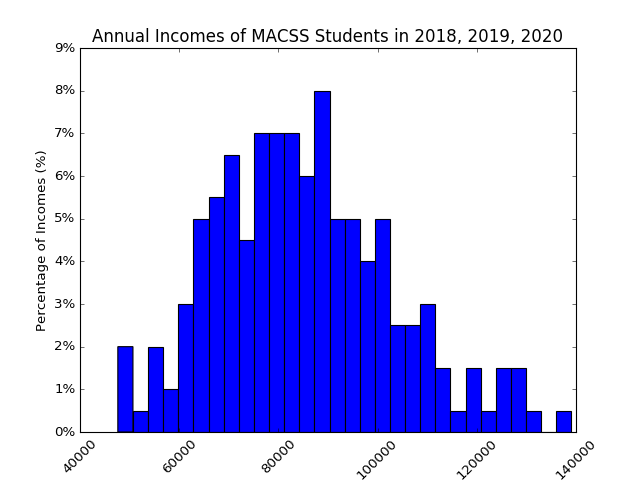

In [47]:
# Set the parameter, num_bins, num_obs (as the number of elements in the array), 
# and hist_wgts, to make sure that "all the bin heights should sum to 1" 
num_bins = 30
num_obs = len(data)
hist_wgts = (1 / num_obs) * np.ones(num_obs)

# Plot the histogram for the annual incomes
fig, ax = plt.subplots()
plt.hist(data, num_bins, weights=hist_wgts*100) # in order to get the % format, multiply the ""weights" as 0.0X by 100

# Label the plots
plt.title('Annual Incomes of MACSS Students in 2018, 2019, 2020', fontsize=15)
plt.xlabel(r'Annual Incomes (\$s)')
plt.ylabel(r'Percentage of Incomes')

# Set the Limit of y-axis
plt.ylim([0,9])
# Rotate the x-axis label 
plt.xticks(rotation=45)

# Format the y-axis label as "%".  
fmt = '%.0f%%' 
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)


<IPython.core.display.Javascript object>


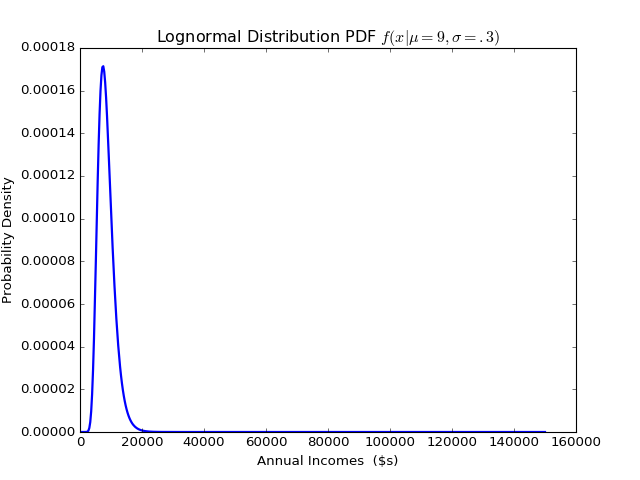

1b.  Log-likelihood value for the parameter ($\mu$=9.0,$\sigma$=0.3) is:  -8298.63695601


/Library/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in true_divide
/Library/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: divide by zero encountered in log
/Library/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in multiply


In [62]:
def lognorm_pdf(xvals, mu, sigma, cutoff):
    '''
    --------------------------------------------------------------------
    Generate pdf values from the lognormal pdf with mean mu and standard
    deviation sigma. If the cutoff is given, then the PDF values are
    inflated upward to reflect the zero probability on values above the
    cutoff. If there is no cutoff given, this function does the same
    thing as sp.stats.norm.pdf(x, loc=mu, scale=sigma).
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the lognormally distributed random
             variable
    mu     = scalar, mean of the lognormally distributed random variable
    sigma  = scalar > 0, standard deviation of the lognormally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    prob_notcut = scalar 
    pdf_vals = (N,) vector, normal PDF values for mu and sigma
               corresponding to xvals data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    if cutoff == 'None':
        prob_notcut = 1.0
    else:
        prob_notcut = sts.lognorm.cdf(cutoff, scale= np.exp(mu), s = sigma, loc = mu)
            
    pdf_vals    = ((1/(xvals*sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2))) /
                    prob_notcut)
    
    return pdf_vals


def log_lik_lognorm(xvals, mu, sigma, cutoff):
    '''
    --------------------------------------------------------------------
    Compute the log likelihood function for data xvals given lognormal
    distribution parameters mu and sigma.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the lognormally distributed random
             variable
    mu     = scalar, mean of the lognormally distributed random variable
    sigma  = scalar > 0, standard deviation of the lognormally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        norm_pdf()
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals    = (N,) vector, normal PDF values for mu and sigma
                  corresponding to xvals data
    ln_pdf_vals = (N,) vector, natural logarithm of normal PDF values
                  for mu and sigma corresponding to xvals data
    log_lik_val = scalar, value of the log likelihood function
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: log_lik_val
    --------------------------------------------------------------------
    '''
    pdf_vals = lognorm_pdf(xvals, mu, sigma, cutoff)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val



# set up the parameters for test lognorm distribution 
start = 0
end = 150000
num = 500
dist_pts = np.linspace(start, end, num) 
# to create the linespace for the start = 0, end = 150,000, number of data points = 500
mu_test = 9.0
sig_test = 0.3


# Plot the test lognorm distribution 
fig, ax = plt.subplots()

plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_test, sig_test, 'None'),
         linewidth=2, color='b')
plt.ylabel('Probability Density')
plt.xlabel ('Annual Incomes  (\$s)')
plt.title('Lognormal Distribution PDF $f(x|\mu=9,\sigma=.3)$')

# Calculate and print the Log-likelihood value for the given parameters and data:
print('1b. ', 'Log-likelihood value for the parameter ($\mu$=9.0,$\sigma$=0.3) is: ', log_lik_lognorm(data, mu_test, sig_test, 'None'))

<IPython.core.display.Javascript object>


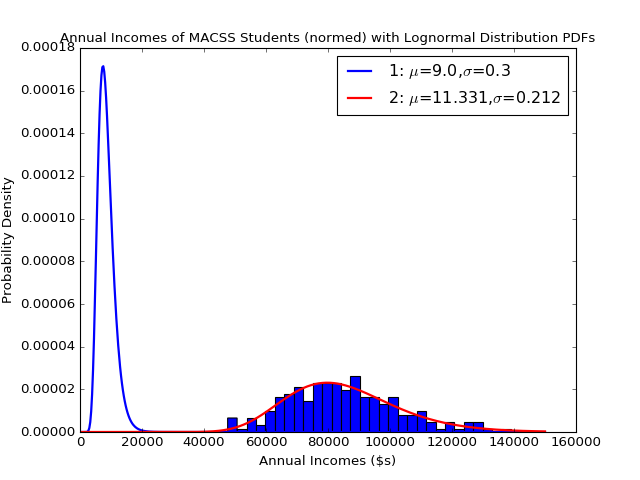

1c.  ML estimates for mu is  11.3314404077 , and the sigma is  0.211674582579 . The value of likelihood function is  -2239.534744 .
1c. VCV(MLE) =  [[  3.15298376e-04   4.17025159e-06]
 [  4.17025159e-06   1.12281205e-04]]
1c. Standard error for mu estimate =  0.0177566431527
1c. Standard error for sigma estimate =  0.0105962825978


/Library/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in true_divide
/Library/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: divide by zero encountered in log
/Library/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in multiply


In [134]:
def crit(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    --------------------------------------------------------------------
    INPUTS:
    mu     = scalar, mean of the lognormally distributed random variable
    sigma  = scalar > 0, standard deviation of the lognormally distributed
             random variable
    xvals  = (N,) vector, values of the lognormally distributed random
             variable
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        log_lik_norm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    log_lik_val = scalar, value of the log likelihood function
    neg_log_lik_val = scalar, negative of log_lik_val
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals, cutoff = args
    log_lik_val = log_lik_lognorm(xvals, mu, sigma, cutoff)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val



# By using scipy.optimize.minimize() function to optimize the parameters of lognormal distribution 
mu_init = 11.0
sig_init = 0.2
params_init = np.array([mu_init, sig_init])
bnds = ((None, None), (0.00001, None))
mle_args = (data, 'None')
results = opt.minimize(crit, params_init, args=(mle_args), bounds = bnds)
mu_MLE, sig_MLE = results.x



fig, ax = plt.subplots()
# Plot the histogram for the annual incomes
count, bins, ignored = plt.hist(data, num_bins, normed=True)
# Label the plots
plt.title('Annual Incomes of MACSS Students (normed) with Lognormal Distribution PDFs', fontsize=12)
plt.xlabel(r'Annual Incomes (\$s)')
plt.ylabel(r'Probability Density')

# Plot the test lognormal distribution:
plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_test, sig_test, 'None'),
         linewidth=2, color='b', label='1: $\mu$=9.0,$\sigma$=0.3')

# Plot the ML estimated lognormal distribution:
plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_MLE, sig_MLE, 'None'),
         linewidth=2, color='r', label='2: $\mu$=11.331,$\sigma$=0.212')

plt.legend(loc='upper right')

# The variance-covariance matrix of ML estimates
vcv_mle = results.hess_inv.todense()
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])


print('1c. ', 'ML estimates for mu is ', mu_MLE, ', and the sigma is ', sig_MLE, 
     '. The value of likelihood function is ', -results.fun, '.')
print('1c. VCV(MLE) = ', vcv_mle)
print('1c. Standard error for mu estimate = ', stderr_mu_mle)
print('1c. Standard error for sigma estimate = ', stderr_sig_mle)

In [137]:
#1-d)

log_lik_h0 = log_lik_lognorm(data, mu_test, sig_test, 'None')
log_lik_mle = log_lik_lognorm(data, mu_MLE, sig_MLE, 'None')
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)


chi squared of H0 with 2 degrees of freedom p-value =  0.0


In [141]:
#1-e)
mu = mu_MLE
sigma = sig_MLE
prb_more_than = 1 - sts.lognorm.cdf(100000, scale= np.exp(mu), s = sigma, loc = mu)
prb_less_than = sts.lognorm.cdf(75000, scale= np.exp(mu), s = sigma, loc = mu)

print ('1e. According to the estimated distribution of incones, the probability that MACSS students will earn more than $1000,000 is',
      prb_more_than, 'and the probability that they will earn less than $75,000 is ', prb_less_than, '.')


1e. According to the estimated distribution of incones, the probability that MACSS students will earn more than $1000,000 is 0.195766021972 and the probability that they will earn less than $75,000 is  0.307688434489 .


In [311]:
import pandas as pd
sick = pd.read_csv('sick.txt', skiprows = 1, names = ['sick', 'age', 'children', 'avgtemp_winter'])
sick


# Define the norm_pdf() function to creat the normal distribution
def norm_pdf(xvals, mu, sigma, cutoff):
    '''
    --------------------------------------------------------------------
    Generate pdf values from the normal pdf with mean mu and standard
    deviation sigma. If the cutoff is given, then the PDF values are
    inflated upward to reflect the zero probability on values above the
    cutoff. If there is no cutoff given, this function does the same
    thing as sp.stats.norm.pdf(x, loc=mu, scale=sigma).
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    prob_notcut = scalar 
    pdf_vals = (N,) vector, normal PDF values for mu and sigma
               corresponding to xvals data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    if cutoff == 'None':
        prob_notcut = 1.0
    else:
        prob_notcut = sts.norm.cdf(cutoff, loc=mu, scale=sigma)
            
    pdf_vals    = ((1/(sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (xvals - mu)**2 / (2 * sigma**2))) /
                    prob_notcut)
    
    return pdf_vals

    
    
# Define log likelihood function for the normal distribution given the data 'sick'
def log_lik_sick(xdf, b0, b1, b2, b3, sigma, cutoff):
    '''
    --------------------------------------------------------------------
    Compute the log likelihood function for data xvals given normal
    distribution parameters mu and sigma.
    --------------------------------------------------------------------
    INPUTS:
    xdf  = (N,) vector, values of the normally distributed random
             variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    b0, b1, b2, b3 
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        norm_pdf()
    
    RETURNS: log_lik_val
    --------------------------------------------------------------------
    '''
    xvals = xdf['sick'] - b0 - b1 * xdf['age'] - b2 * xdf['children'] - b3 * xdf['avgtemp_winter']
    pdf_vals = norm_pdf(xvals, 0, sigma, cutoff)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_sick(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    --------------------------------------------------------------------
    INPUTS:
    b0, b1, b2, b3     = co-effienct for the linear equation
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    xdf  = dataframe for sick people
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        log_lik_sick()
    
    OBJECTS CREATED WITHIN FUNCTION:
    log_lik_val = scalar, value of the log likelihood function
    neg_log_lik_val = scalar, negative of log_lik_val
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    b0, b1, b2, b3, sigma = params
    xdf, cutoff = args
    log_lik_val = log_lik_sick(xdf, b0, b1, b2, b3, sigma, cutoff)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val



# Set the initial co-effecients
b0_init, b1_init, b2_init, b3_init, sig_init = (0, 0, 0, 0, 1)
params_init = np.array([b0_init, b1_init, b2_init, b3_init, sig_init])
bnds = ((None, None), (None, None), (None, None), (None, None), (.000001, None))
mle_args = (sick, 'None')


# First using 'SLSQP' method to get the MLE co-effecients
results = opt.minimize(crit_sick, params_init, args=(mle_args), bounds=bnds, method='SLSQP')
b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE = results.x

print('2a-1. ', 'b0_MLE=', b0_MLE, ' b1_MLE=', b1_MLE, ' b2_MLE=', b2_MLE, ' b3_MLE=', b3_MLE, ' sig_MLE=', sig_MLE)
print('2a-2. ', 'Maximized log-likelihood : ', log_lik_sick(sick, b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE, 'None'))


# Then set these co-effecients as the initial value for the 'L-BFGS-B'
b0_init, b1_init, b2_init, b3_init, sig_init = (b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE)
result2 = opt.minimize(crit_sick, params_init, args=(mle_args), bounds=bnds, method='L-BFGS-B')
#print(result2)
# But I found, in fact only using 'SLSQP' can give the best MLE result



vcv_mle = result2.hess_inv.todense()
print('2a-3. ', 'VCV(MLE) = ', vcv_mle)



2a-1.  b0_MLE= 0.251646226084  b1_MLE= 0.012933347781  b2_MLE= 0.400502030729  b3_MLE= -0.00999166733162  sig_MLE= 0.00301769300642
2a-2.  Maximized log-likelihood :  876.8650474672079
2a-3.  VCV(MLE) =  [[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


In [315]:

b0_init, b1_init, b2_init, b3_init, sig_init = (1, 0, 0, 0, 0.01)
log_lik_h0 = log_lik_sick(sick,b0_init, b1_init, b2_init, b3_init, sig_init, 'None')
log_lik_mle = log_lik_sick(sick, b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE, 'None')
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 5)
print('2b. ', 'chi squared of H0 with 5 degrees of freedom p-value = ', pval_h0, '. It is not likely that age, number of children, and average winter temperature have no impact on the sick days.')



2b.  chi squared of H0 with 5 degrees of freedom p-value =  0.0 . It is not likely that number of children, average winter temperature have impact on the sick days.


In [303]:
b0_init
   

0